In [7]:
import os
from pathlib import Path
from collect_validation_results import collect_validation_results
import pandas as pd

# Detect environment and set base directory
IS_COLAB = 'COLAB_GPU' in os.environ or os.path.exists('/content')
if IS_COLAB:
    # Running in Google Colab
    BASE_DIR = Path('/computer_vision_yolo/yolo_test')
else:
    # Running locally
    BASE_DIR = Path.cwd()

# Create output directory for saving comparison plots
OUTPUT_DIR = BASE_DIR / 'comparison'
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

print(f"Environment: {'Google Colab' if IS_COLAB else 'Local'}")
print(f"Base directory: {BASE_DIR}")
print(f"Output directory: {OUTPUT_DIR}")
print(f"✓ All visualizations will be saved to: {OUTPUT_DIR}")

Environment: Local
Base directory: /Users/mahdy/projects/yolo_training/yolo_test
Output directory: /Users/mahdy/projects/yolo_training/yolo_test/comparison
✓ All visualizations will be saved to: /Users/mahdy/projects/yolo_training/yolo_test/comparison


## Load All Results

In [8]:
# Specify runs directory (relative to BASE_DIR)
runs_dir = BASE_DIR / "runs"
runs_analysis_dir = BASE_DIR / "analysis_runs"

# Collect all results (same format as notebook)
collected_results_summary, collected_validation_results = collect_validation_results(
    runs_dir=runs_dir,
    analysis_runs_dir=runs_analysis_dir,
    verbose=True,
    dataset_name=None,  # Set to None to collect from all datasets
)

print(f"\nLoaded {len(collected_results_summary)} results")
print(f"Models: {list(collected_validation_results.keys())}")

#add filter to select define models
defined_models = [] 



#nano
# defined_models = ["yolov8n", "yolov9t", "yolov10n","yolo11n","yolo12n"] 

#small
# defined_models = ["yolov8s", "yolov9s", "yolov10s","yolo11s","yolo12s"] 

#medium
# defined_models = ["yolov8m","yolov9m", "yolov9c" ,"yolov10m","yolo11m","yolo12m"] 

#x-large
# defined_models = ["yolov8x", "yolov9e","yolov10x", "yolo11x","yolo12x"] 


# nano+ small 
# defined_models = ["yolov8n", "yolov9t", "yolov10n","yolo11n","yolo12n","yolov8s", "yolov9s", "yolov10s","yolo11s","yolo12s"] 

#small + medium
# defined_models = ["yolov8s", "yolov9s", "yolov10s","yolo11s","yolo12s", "yolov8m","yolov9m", "yolov9c" ,"yolov10m","yolo11m","yolo12m"] 

#nano+ small + medium
# defined_models = ["yolov8n", "yolov9t", "yolov10n","yolo11n","yolo12n","yolov8s", "yolov9s", "yolov10s","yolo11s","yolo12s","yolov8m", "yolov9m", "yolov9c", "yolov10m","yolo11m","yolo12m"] 

#small + medium + x-large
# defined_models = ["yolov8s", "yolov9s", "yolov10s","yolo11s","yolo12s", "yolov8m","yolov9m", "yolov9c" ,"yolov10m","yolo11m","yolo12m","yolov8x", "yolov9e","yolov10x", "yolo11x","yolo12x"] 

#medium+ x-large
# defined_models = ["yolov8m","yolov9m", "yolov9c" ,"yolov10m","yolo11m","yolo12m","yolov8x", "yolov9e","yolov10x", "yolo11x","yolo12x"] 



#yolo 8
# defined_models = [ "yolov8n", "yolov8s","yolov8m","yolov8l","yolov8x"]  

defined_models =["yolov8m","yolov8m_finetuned_1","yolov8m_finetuned_1_finetuned_20251128","yolo12s"]


results_summary = [res for res in collected_results_summary if res["model_name"] in defined_models]
validation_results = {k: v for k, v in collected_validation_results.items() if k in defined_models}


# results_summary = [res for res in collected_results_summary if res["model_name"] not in defined_models]
# validation_results = {k: v for k, v in collected_validation_results.items() if k not in defined_models}

📁 Found 22 directories in runs/
📁 Found 2 directories in analysis_runs/
📁 Scanning 24 total run directories...
✓ Loaded: yolov8m_finetuned_1_finetuned_20251128 (Run: yolov8m_finetuned_1_finetuned_20251128_testing_20251128_230949)
✓ Loaded: yolov8m_finetuned_1 (Run: yolov8m_finetuned_1_testing_20251127_210146)
✓ Loaded: yolo11m (Run: yolo11m_testing_20251128_003534)
✓ Loaded: yolo11n (Run: yolo11n_testing_20251128_000944)
✓ Loaded: yolo11s (Run: yolo11s_testing_20251128_002304)
✓ Loaded: yolo11x (Run: yolo11x_testing_20251128_004839)
✓ Loaded: yolo12m (Run: yolo12m_testing_20251128_013147)
✓ Loaded: yolo12n (Run: yolo12n_testing_20251128_010328)
✓ Loaded: yolo12s (Run: yolo12s_testing_20251128_011819)
✓ Loaded: yolo12x (Run: yolo12x_testing_20251128_014537)
✓ Loaded: yolov10m (Run: yolov10m_testing_20251127_233752)
✓ Loaded: yolov10n (Run: yolov10n_testing_20251127_230435)
✓ Loaded: yolov10s (Run: yolov10s_testing_20251127_232138)
✓ Loaded: yolov10x (Run: yolov10x_testing_20251127_23525

## View Results Summary as DataFrame

In [9]:
# Convert to DataFrame for easy viewing
# df_summary = pd.DataFrame(results_summary)
results_df = pd.DataFrame(results_summary)

results_df

,model_name,dataset,split,iou,precision_confusion,recall_confusion,f1_confusion,precision_yolo,recall_yolo,map50,map50_95,params_m,size_mb,fps,status,run_dir
0,yolov8m_finetuned_1_finetuned_20251128,bdd100k_yolo_limited,test,0.5,0.724592,0.785857,0.753982,0.637140,0.549557,0.585000,0.333778,25.862110,49.613909,329.519350,ok,/Users/mahdy/projects/yolo_training/yolo_test/...
1,yolov8m_finetuned_1,bdd100k_yolo_limited,test,0.5,0.697207,0.781419,0.736915,0.632903,0.544459,0.568252,0.323650,25.862110,49.609575,423.121358,ok,/Users/mahdy/projects/yolo_training/yolo_test/...
2,yolo12s,bdd100k_yolo_limited,test,0.5,0.268939,0.713098,0.390575,0.141378,0.117886,0.113098,0.061042,9.285632,18.122926,470.514687,ok,/Users/mahdy/projects/yolo_training/yolo_test/...
3,yolov8m,bdd100k_yolo_limited,test,0.5,0.319582,0.676470,0.434089,0.148396,0.123551,0.122517,0.066747,25.902640,49.720521,420.943622,ok,/Users/mahdy/projects/yolo_training/yolo_test/...


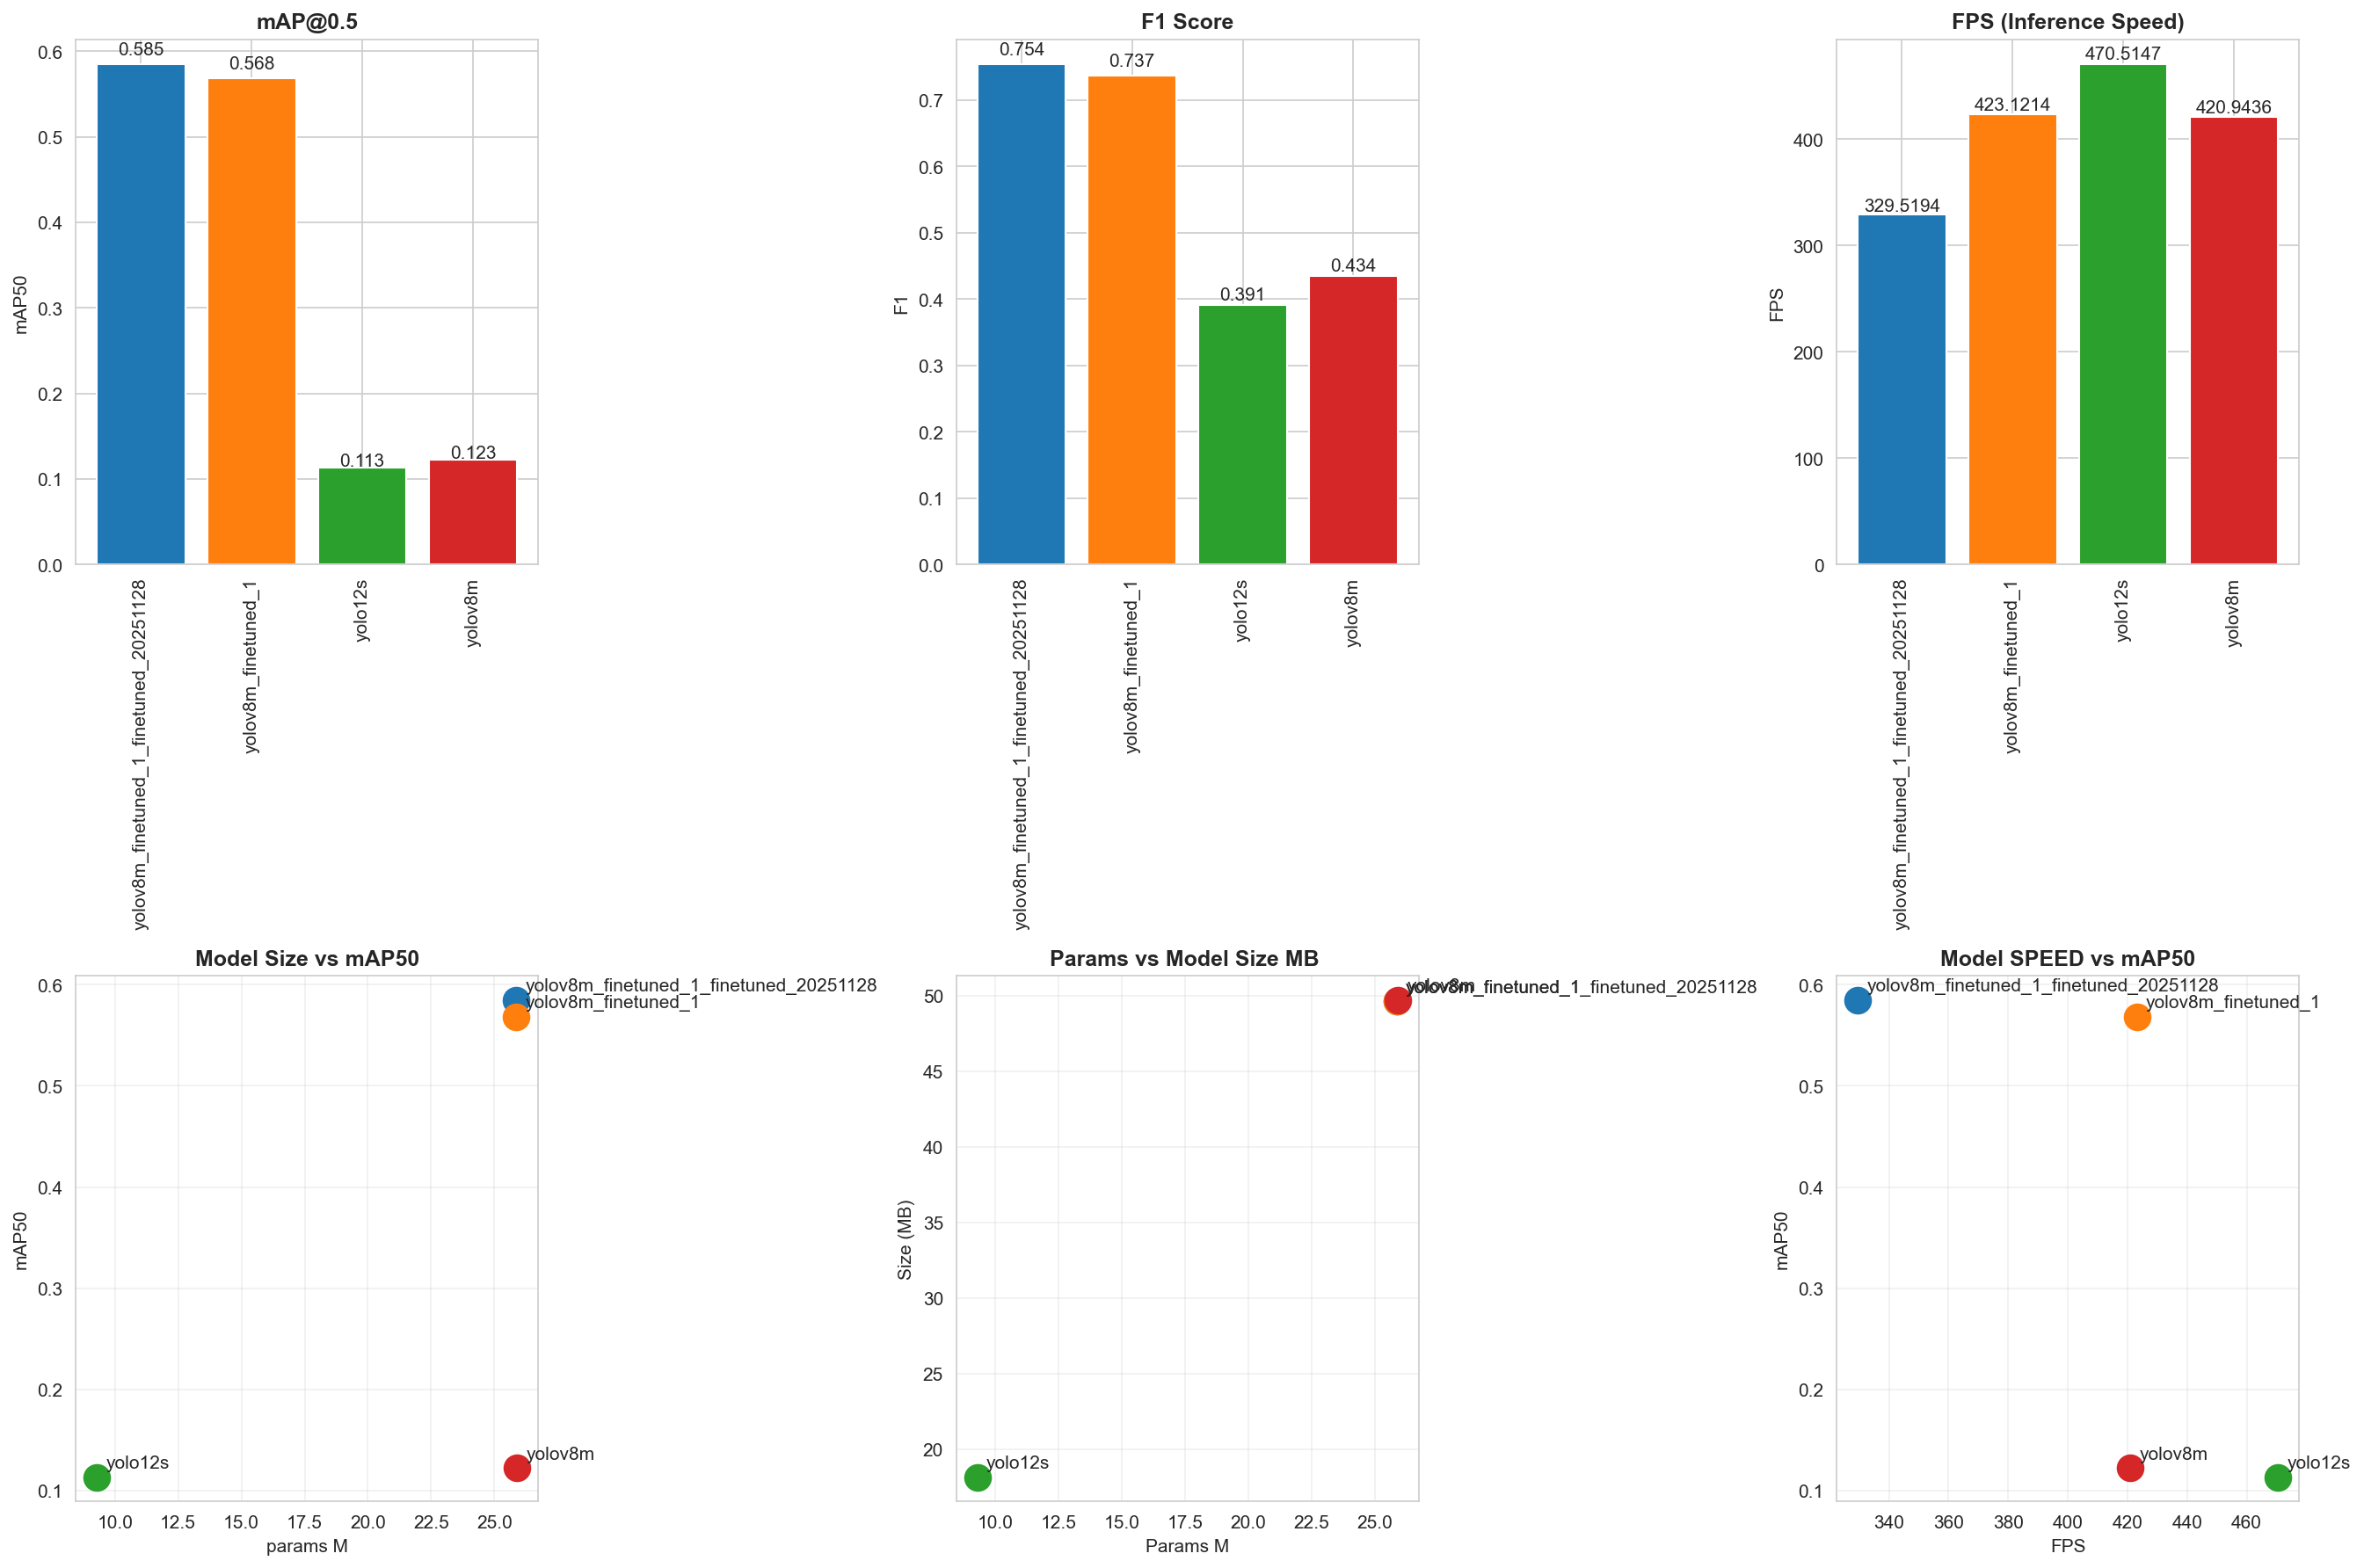

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

success_df = results_df[results_df["status"] == "ok"].copy()

# ---------------------------
# Assign stable colors
# ---------------------------
palette = sns.color_palette("tab10", len(success_df))
model_colors = {
    m: palette[i]
    for i, m in enumerate(success_df["model_name"])
}

models = success_df["model_name"].tolist()
colors = [model_colors[m] for m in models]

sns.set_style("whitegrid")
plt.close('all')

fig, axes = plt.subplots(2, 3, figsize=(18, 12), dpi=150)

# -----------------------------------
# 1) mAP@0.5
# -----------------------------------
axes[0,0].bar(models, success_df["map50"], color=colors)
axes[0,0].set_title("mAP@0.5", fontweight="bold")
axes[0,0].set_ylabel("mAP50")
axes[0,0].tick_params(axis='x', rotation=90)
for i, v in enumerate(success_df["map50"]):
    axes[0,0].text(i, v * 1.02, f"{v:.3f}", ha="center")

# -----------------------------------
# 2) F1 Score
# -----------------------------------
axes[0,1].bar(models, success_df["f1_confusion"], color=colors)
axes[0,1].set_title("F1 Score", fontweight="bold")
axes[0,1].set_ylabel("F1")
axes[0,1].tick_params(axis='x', rotation=90)
for i, v in enumerate(success_df["f1_confusion"]):
    axes[0,1].text(i, v * 1.02, f"{v:.3f}", ha="center")



# -----------------------------------
# 3) FPS (tiny values → use relative label placement)
# -----------------------------------
axes[0,2].bar(models, success_df["fps"], color=colors)
axes[0,2].set_title("FPS (Inference Speed)", fontweight="bold")
axes[0,2].set_ylabel("FPS")
axes[0,2].tick_params(axis='x', rotation=90)

for i, v in enumerate(success_df["fps"]):
    axes[0,2].text(i, v * 1.01, f"{v:.4f}", ha="center")
    
# -----------------------------------
# 4) Size vs Performance (scatter)
# -----------------------------------


for i, row in success_df.iterrows():
    axes[1,0].scatter(row["params_m"], row["map50"], 
                      s=200, color=model_colors[row["model_name"]])
    axes[1,0].annotate(row["model_name"],
                       (row["params_m"], row["map50"]),
                       xytext=(5, 5), textcoords="offset points")

axes[1,0].set_title("Model Size vs mAP50", fontweight="bold")
axes[1,0].set_xlabel("params M")
axes[1,0].set_ylabel("mAP50")
axes[1,0].grid(True, alpha=0.3)
    
# -----------------------------------
# 5) Size vs Performance (scatter)
# -----------------------------------
for i, row in success_df.iterrows():
    axes[1,1].scatter(row["params_m"], row["size_mb"], 
                      s=200, color=model_colors[row["model_name"]])
    axes[1,1].annotate(row["model_name"],
                       (row["params_m"], row["size_mb"]),
                       xytext=(5, 5), textcoords="offset points")

axes[1,1].set_title("Params vs Model Size MB ", fontweight="bold")
axes[1,1].set_xlabel("Params M")
axes[1,1].set_ylabel("Size (MB)")
axes[1,1].grid(True, alpha=0.3)
    
# -----------------------------------
# 6) FPS (tiny values → use relative label placement)
# -----------------------------------
for i, row in success_df.iterrows():
    axes[1,2].scatter(row["fps"], row["map50"], 
                      s=200, color=model_colors[row["model_name"]])
    axes[1,2].annotate(row["model_name"],
                       (row["fps"], row["map50"]),
                       xytext=(5, 5), textcoords="offset points")

axes[1,2].set_title("Model SPEED vs mAP50", fontweight="bold")
axes[1,2].set_xlabel("FPS")
axes[1,2].set_ylabel("mAP50")
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'model_comparison_overview.png', dpi=300, bbox_inches='tight')
plt.show()

Per-Class Performance Comparison Across Models


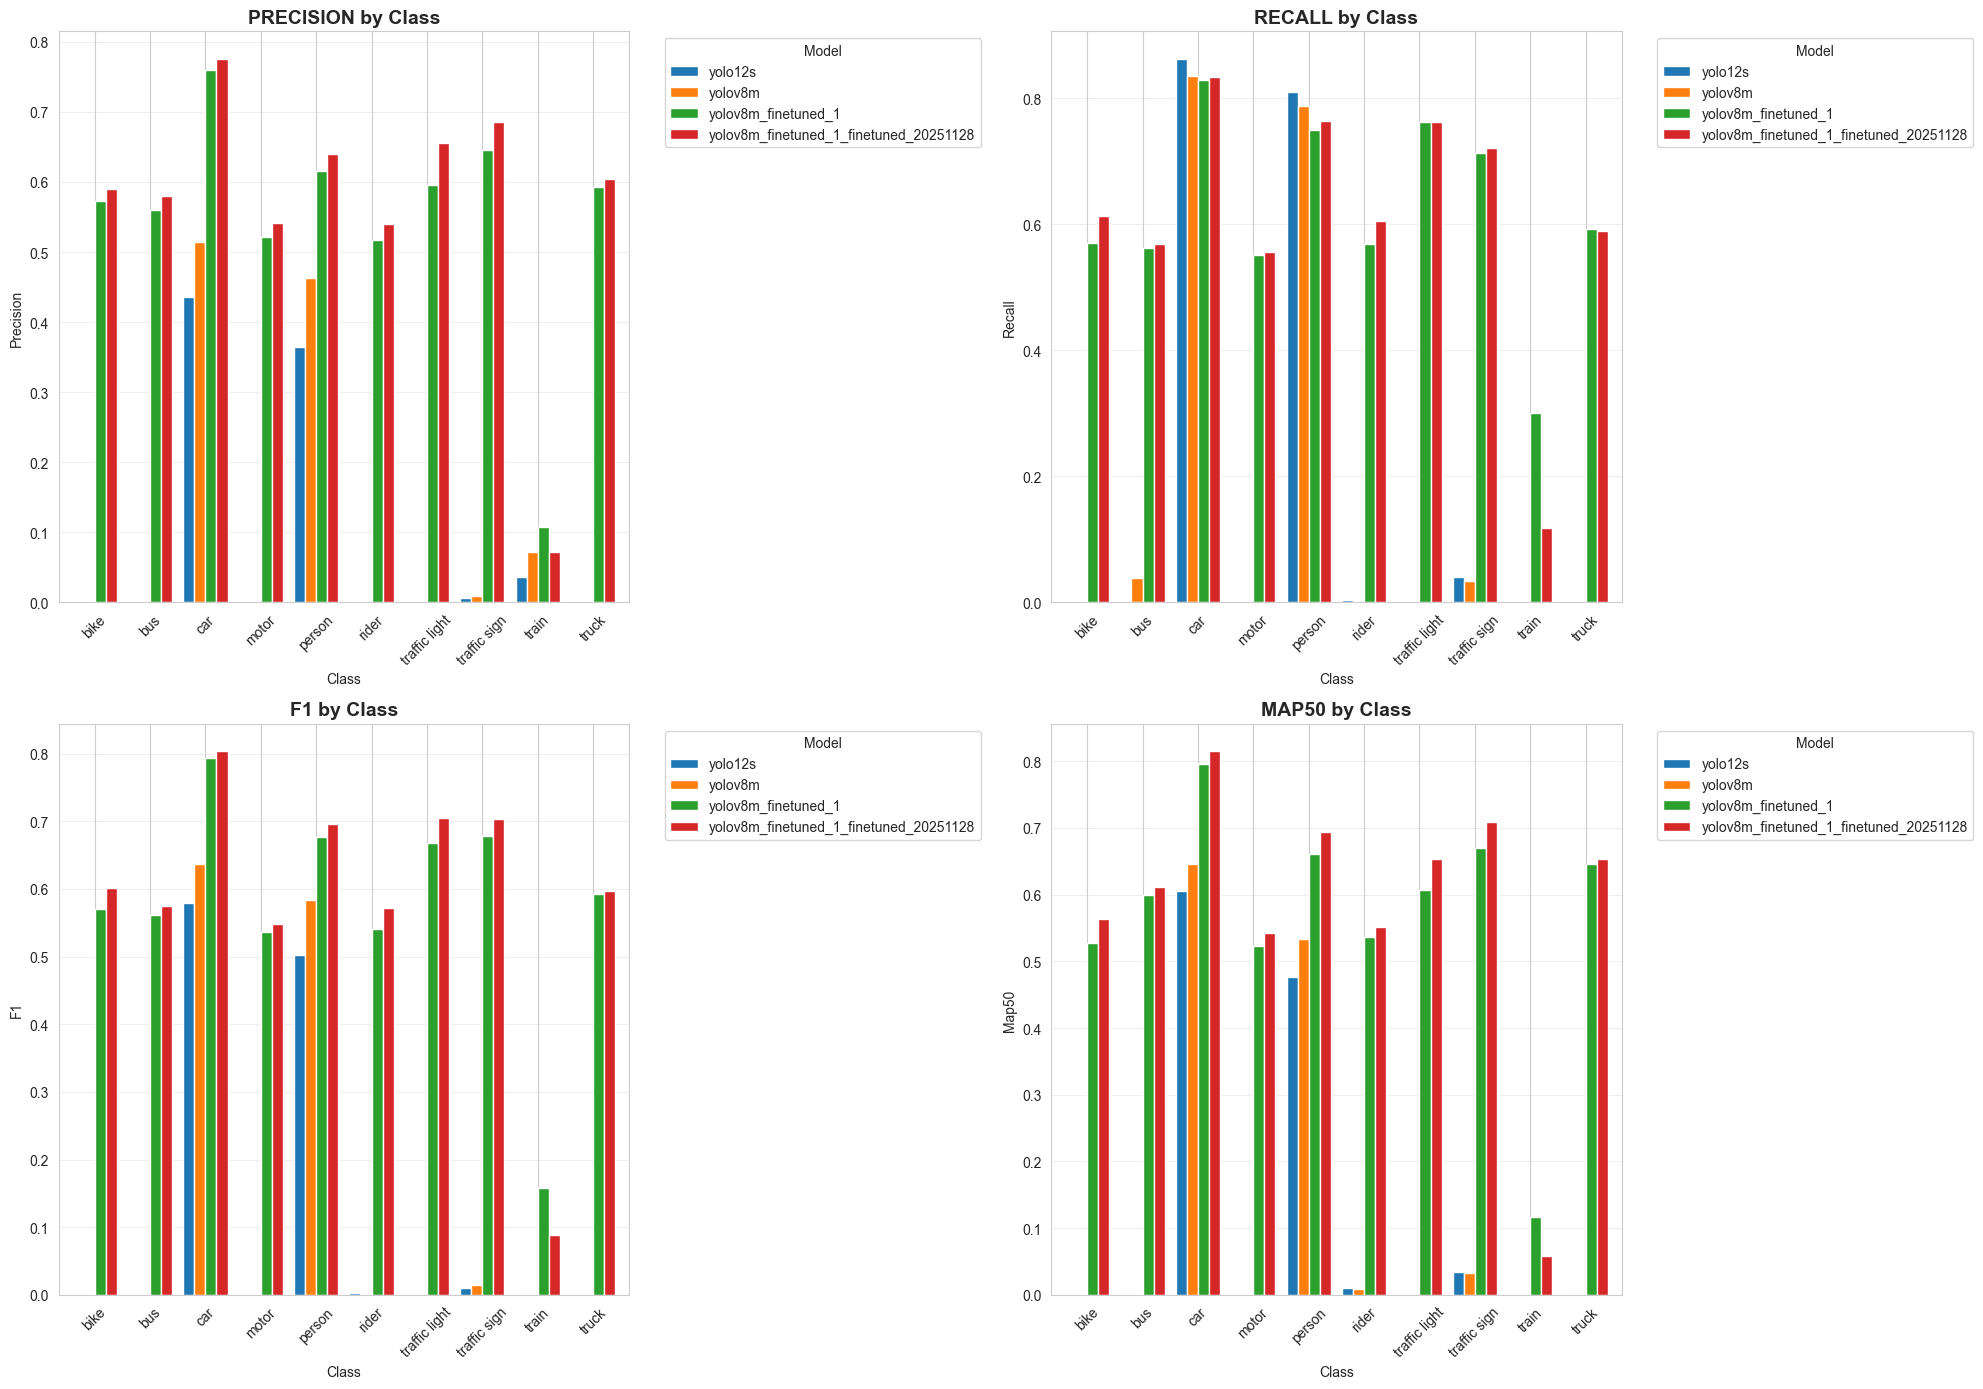


📊 Detailed Per-Class Metrics:
                   f1                              \
model         yolo12s yolov8m yolov8m_finetuned_1   
class                                               
bike           0.0000  0.0002              0.5710   
bus            0.0000  0.0006              0.5613   
car            0.5793  0.6365              0.7929   
motor          0.0000  0.0000              0.5363   
person         0.5029  0.5835              0.6764   
rider          0.0021  0.0020              0.5415   
traffic light  0.0000  0.0000              0.6685   
traffic sign   0.0108  0.0142              0.6782   
train          0.0008  0.0014              0.1579   
truck          0.0000  0.0000              0.5923   

                                                       map50          \
model         yolov8m_finetuned_1_finetuned_20251128 yolo12s yolov8m   
class                                                                  
bike                                          0.6010  0.0002  0

In [11]:
# 8. Per-Class Performance Comparison
if validation_results:
    print("=" * 80)
    print("Per-Class Performance Comparison Across Models")
    print("=" * 80)
    
    # Collect per-class data from the loaded JSON structure
    per_class_comparison = []
    for model_name, result in validation_results.items():
        # Access per_class metrics from the result structure
        per_class_metrics = result["metrics"]["per_class"]
        yolo_class_metrics = result["metrics"]["yolo_class_metrics"]
        
        for class_name, metrics in per_class_metrics.items():
            # Get mAP@0.5 from YOLO class metrics
            map50 = yolo_class_metrics.get(class_name, {}).get("ap50", 0.0)
            
            per_class_comparison.append({
                "model": model_name,
                "class": class_name,
                "precision": metrics.get("precision", 0.0),
                "recall": metrics.get("recall", 0.0),
                "f1": metrics.get("f1_score", 0.0),
                "map50": map50,
            })
    
    per_class_df = pd.DataFrame(per_class_comparison)
    
    # Get unique classes
    classes = per_class_df["class"].unique()
    
    # Plot comparison for each metric
    fig, axes = plt.subplots(2, 2, figsize=(20, 14))
    
    for ax, metric in zip(axes.flatten(), ["precision", "recall", "f1", "map50"]):
        pivot_data = per_class_df.pivot(index="class", columns="model", values=metric)
        pivot_data.plot(kind="bar", ax=ax, width=0.8)
        ax.set_title(f"{metric.upper()} by Class", fontweight='bold', fontsize=14)
        ax.set_ylabel(metric.capitalize())
        ax.set_xlabel("Class")
        ax.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / 'per_class_performance_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Display detailed table
    print("\n📊 Detailed Per-Class Metrics:")
    print(per_class_df.pivot_table(
        index="class",
        columns="model",
        values=["precision", "recall", "f1", "map50"],
        aggfunc="first"
    ).round(4))
else:
    print("No validation results available.")

In [12]:
# 9. Summary Report
print("=" * 80)
print("SUMMARY REPORT")
print("=" * 80)

if not results_df.empty:
    success_df = results_df[results_df["status"] == "ok"]
    
    if not success_df.empty:
        # Best model by different criteria
        best_map50 = success_df.loc[success_df["map50"].idxmax()]
        best_f1 = success_df.loc[success_df["f1_confusion"].idxmax()]
        best_fps = success_df.loc[success_df["fps"].idxmax()]
        smallest = success_df.loc[success_df["size_mb"].idxmin()]
        
        print("\n🏆 Best Model by mAP@0.5:")
        print(f"   {best_map50['model_name']} - mAP@0.5: {best_map50['map50']:.4f}")
        
        print("\n🏆 Best Model by F1 Score:")
        print(f"   {best_f1['model_name']} - F1: {best_f1['f1_confusion']:.4f}")
        
        print("\n⚡ Fastest Model:")
        print(f"   {best_fps['model_name']} - FPS: {best_fps['fps']:.2f}")
        
        print("\n📦 Smallest Model:")
        print(f"   {smallest['model_name']} - Size: {smallest['size_mb']:.1f} MB")
        
        print("\n" + "=" * 80)
        print("Detailed Comparison Table:")
        print("=" * 80)
        display(success_df[[
            "model_name", "map50", "map50_95", "f1_confusion",
            "precision_yolo", "recall_yolo", "params_m", "size_mb", "fps"
        ]].round(4))
    else:
        print("No successful runs to summarize.")
else:
    print("No results to display.")

SUMMARY REPORT

🏆 Best Model by mAP@0.5:
   yolov8m_finetuned_1_finetuned_20251128 - mAP@0.5: 0.5850

🏆 Best Model by F1 Score:
   yolov8m_finetuned_1_finetuned_20251128 - F1: 0.7540

⚡ Fastest Model:
   yolo12s - FPS: 470.51

📦 Smallest Model:
   yolo12s - Size: 18.1 MB

Detailed Comparison Table:


,model_name,map50,map50_95,f1_confusion,precision_yolo,recall_yolo,params_m,size_mb,fps
0,yolov8m_finetuned_1_finetuned_20251128,0.5850,0.3338,0.7540,0.6371,0.5496,25.8621,49.6139,329.5194
1,yolov8m_finetuned_1,0.5683,0.3236,0.7369,0.6329,0.5445,25.8621,49.6096,423.1214
2,yolo12s,0.1131,0.0610,0.3906,0.1414,0.1179,9.2856,18.1229,470.5147
3,yolov8m,0.1225,0.0667,0.4341,0.1484,0.1236,25.9026,49.7205,420.9436
